<div style="display: flex;
            justify-content: flex-start;">

<img
     src="Icone_lapage.png"
     alt="logo_lapage"
     WIDTH= 250px
     padding= 7px>

<h1  style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Analyse des indicateurs de vente </h1>
</div>

<h2  style= "background-color: #d4bdcf;
                 color: white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Étude réalisée par Alhassane AHMED</h2>


<nav><ul style="display: flex;
    justify-content: space-between;
    background-color: #945f8a;
    font-family:Helvetica, Arial, verdana, sans-serif;
    font-size:11pt">
    
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C1"><strong>Contexte</strong> </a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C2"><strong>C.A x Categ</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C3"><strong>C.A. x Tranche_age </strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C4"><strong>C.A. x Periode</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C5"><strong>Évolution du C.A.</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C6"> <strong>Profils clients</strong> </a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C7"><strong>Bests Sellers /Fops</strong></a></li>
</ul></nav>




<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C1"> Contexte</a></h2>

Nous avons précédement rapprocher les fichiers products, transactions et customers en un seul fichier : df_final. Dans cette partie, nous allons analyser les indicateurs autour du chiffre d'affaire.

<strong>Plan d'action </strong>

1. Analyser le chiffre d'affaire par catégorie de produit.
2. Analyser le chiffre d'affaire par tranche d'age.
3. Analyser le chiffre d'affaire par période.
4. Analyser l'évolution du chiffre d'affaire dans le temps.
5. Analyser les profils clients.
6. Analyser les tops et les flops.






In [1]:
import math
import scipy.stats as st
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%reload_ext autoreload
%autoreload

In [2]:
# On importe le fichier df_final
df_final = pd.read_csv("df_final.csv")
df_final['date'] = pd.to_datetime(df_final['date'])
#df_final['categ'] = pd.Categorical(df_final['categ'])
df_final.head()

,id_prod,date,session_id,client_id,time,periode,annee,sex,birth,age_client,tranche_age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,2022-05,2022,f,1986,36,36 - 45 ans,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,2022-02,2022,m,1988,34,26 - 35 ans,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,2022-06,2022,f,1968,54,46 - 55 ans,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,2021-06,2021,m,2000,22,16 - 25 ans,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,2023-01,2023,m,1980,42,36 - 45 ans,4.99,0


<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C2"> C.A x Categ </a></h2>

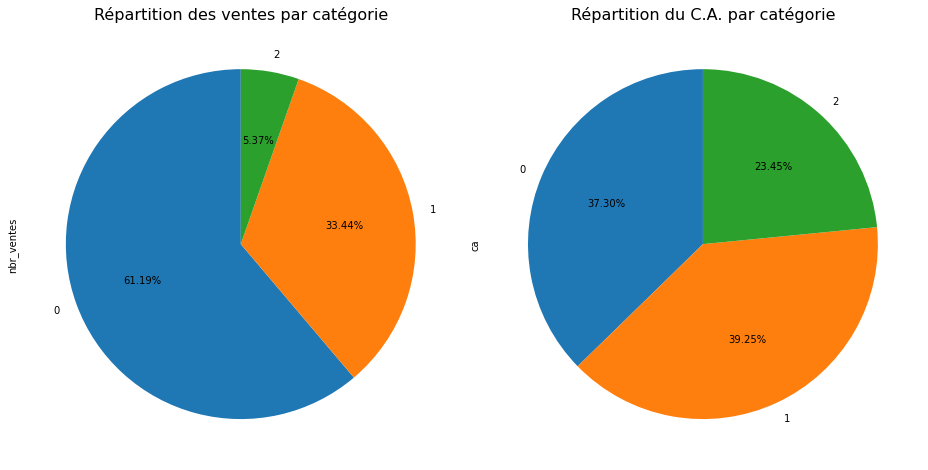

In [3]:
# On calcule la répartition du chiffre par catégorie de produit
df_categ = df_final.groupby(["categ"]).agg({"price":"sum", "id_prod":"count"})
df_categ.rename(columns={"id_prod":"nbr_ventes", "price":"ca"}, inplace=True)

plt.figure( figsize=(13,7) )

colors = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue',"teal","tan", "thistle"]


plt.subplot(121)
plt.title("Répartition des ventes par catégorie", fontsize=16)
df_categ["nbr_ventes"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.subplot(122)
plt.title("Répartition du C.A. par catégorie", fontsize=16)
df_categ["ca"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.tight_layout()
plt.show()

<div class="alert-info">
    <ul>
         <li><strong>Catégorie 0 : </strong> 61.19 % des ventes pour 37.30% du chiffre d'affaire. </li>
         <li><strong>Catégorie 1 : </strong> 33.44% des ventes pour 39.25 % du chiffre d'affaire </li>
         <li><strong>Catégorie 2 : </strong> 5.37% des ventes pour 23.45% du chiffre d'affaire. </li> 
    </ul>
</div>
<br>

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C3"> C.A. x Tranche_age </a></h2>

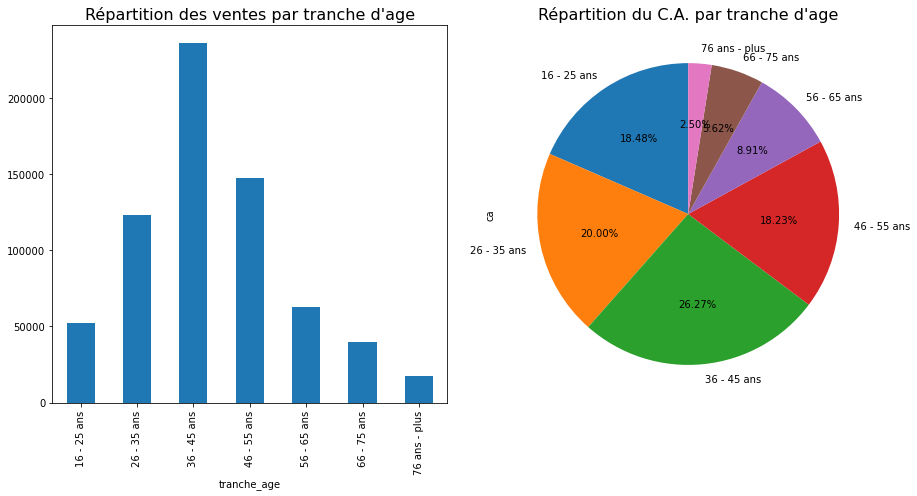

In [4]:
# On calcule la répartition du chiffre d'affaire par tranche d'age
df_tranche =df_final.groupby(["tranche_age",]).agg({"price":"sum", "id_prod":"count"})
df_tranche.rename(columns={"id_prod":"nbr_ventes", "price":"ca"}, inplace=True)

plt.figure( figsize=(13,7) )

colors = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue',"teal","tan", "thistle"]


plt.subplot(121)
plt.title("Répartition des ventes par tranche d'age", fontsize=16)
df_tranche["nbr_ventes"].plot(kind="bar",)

plt.subplot(122)
plt.title("Répartition du C.A. par tranche d'age", fontsize=16)
df_tranche["ca"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------
Catégorie 0


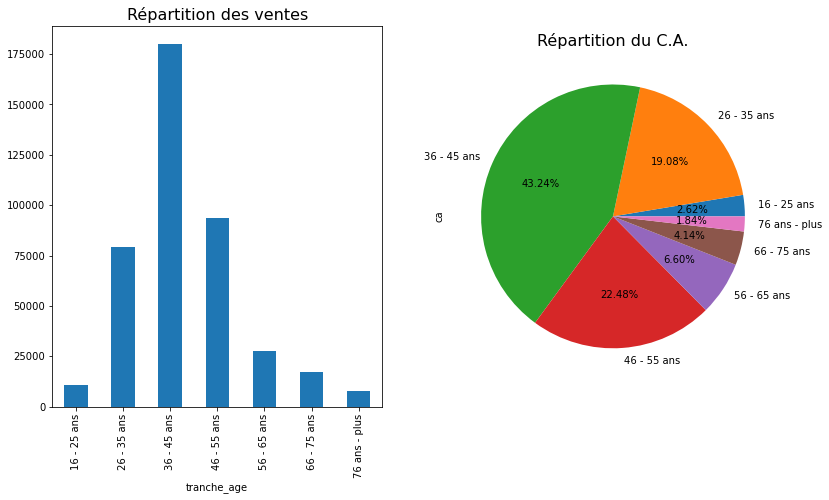

------------------------------------------------------------------------------------------------------------------------
Catégorie 1


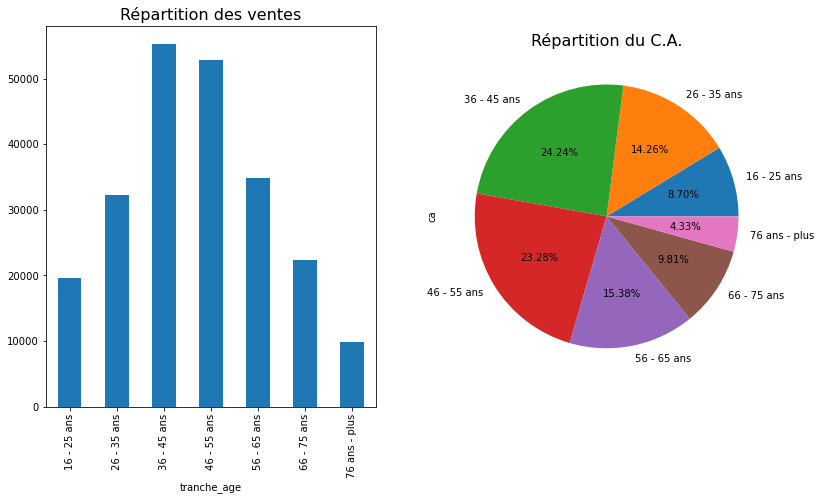

------------------------------------------------------------------------------------------------------------------------
Catégorie 2


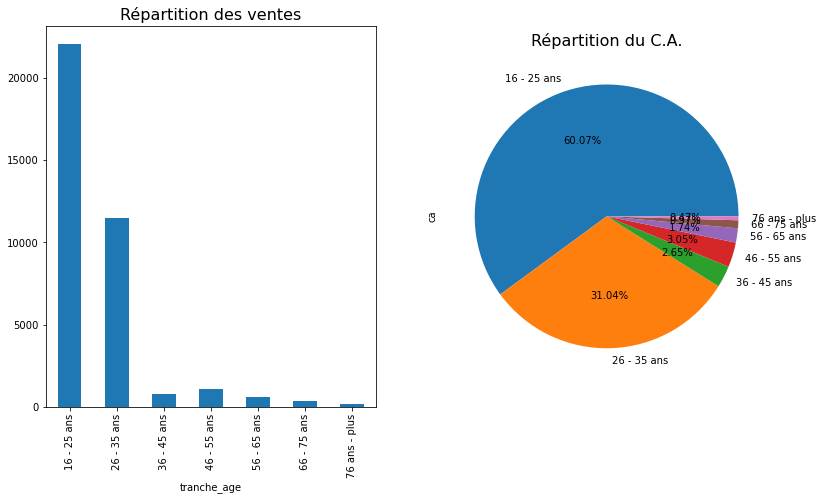

In [6]:
# Chiffre d'affaire par tranche d'âge pour chaque catégorie

for cat in df_final["categ"].unique():
    subset = df_final[df_final.categ == cat]
    s1 = subset.groupby(["tranche_age"]).agg({"price":"sum","id_prod":"count" })
    s1.rename(columns={"price":"ca", "id_prod":"nbr_ventes"}, inplace=True)
    print("-"*120)
    print("Catégorie", cat)
    plt.figure( figsize=(13,7) )
    plt.subplot(121)
    plt.title("Répartition des ventes", fontsize=16)
    s1["nbr_ventes"].plot(kind="bar")
    plt.subplot(122)
    plt.title("Répartition du C.A.", fontsize=16)
    s1["ca"].plot(kind="pie",  autopct='%1.2f%%')
    plt.xticks(rotation = "vertical")
    plt.show()

<div class="alert-info">
    <ul>
         <li><strong>Catégorie 0 : </strong> public de plus de 30ans avec 43% du ca pour les 36-45ans. </li>
         <li><strong>Catégorie 1 : </strong> tout public avec une répartition plus ou moins égalitaire. </li>
         <li><strong>Catégorie 2 : </strong> public jeune avec 55% des 16-25ans. </li> 
    </ul>
</div>
<br>

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C4"> C.A. x Periode </a></h2>

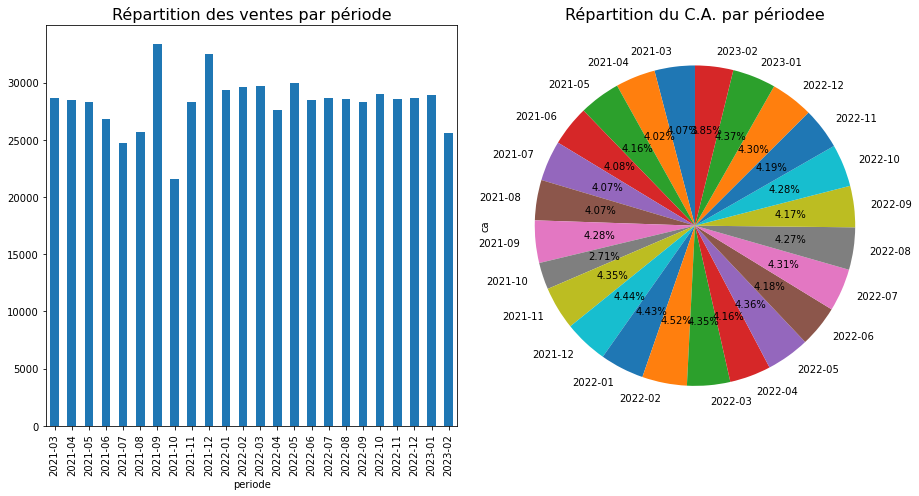

In [7]:
# On calcule la répartition du chiffre par catégorie de produit
df_periode = df_final.groupby(["periode"]).agg({"price":"sum", "id_prod":"count"})
df_periode.rename(columns={"id_prod":"nbr_ventes", "price":"ca"}, inplace=True)

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("Répartition des ventes par période", fontsize=16)
df_periode["nbr_ventes"].plot(kind="bar")

plt.subplot(122)
plt.title("Répartition du C.A. par périodee", fontsize=16)
df_periode["ca"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.tight_layout()
plt.show()

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C5"> Évolution du C.A. </a></h2>

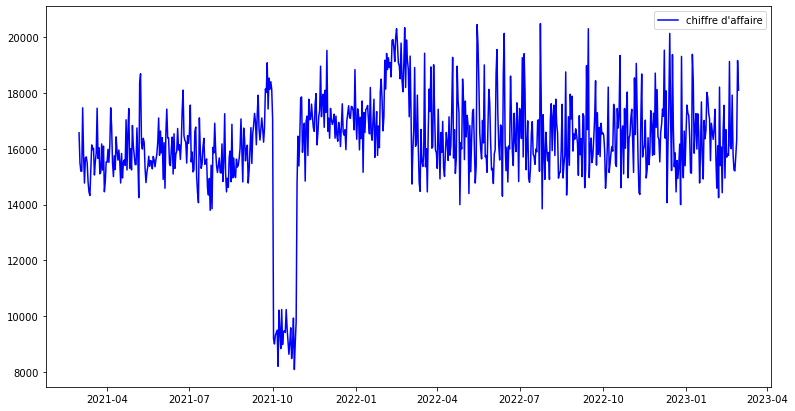

In [3]:
ca_month = df_final.copy()
ca_month1 = ca_month.groupby(["periode","date"]).agg({"price":"sum", "id_prod":"count"}).reset_index()
ca_month1.rename(columns={"price":"ca", "id_prod":"nbr_ventes"}, inplace=True)

# Évolution dans le temps
plt.figure(figsize=(13,7))
plt.plot( ca_month1["date"], ca_month1["ca"], c="blue", label="chiffre d'affaire")
plt.legend()
plt.show()

--------------------------------------------------
Catégorie 0


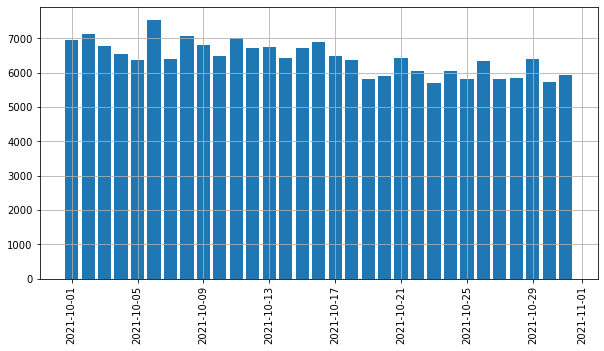

--------------------------------------------------
Catégorie 1


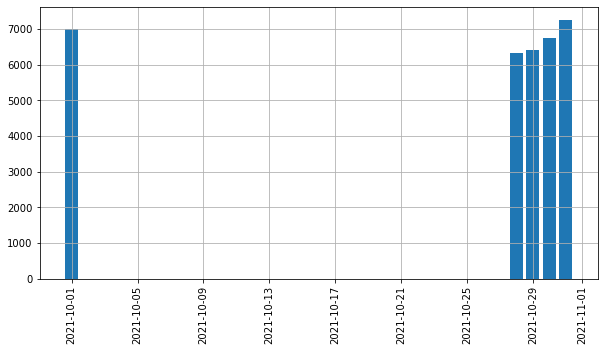

--------------------------------------------------
Catégorie 2


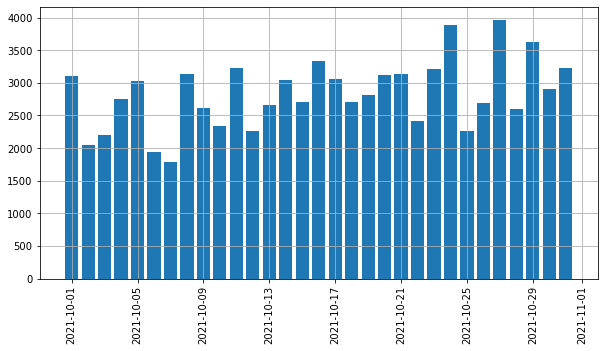

In [9]:
# On check le ca du mois d'octobre pour catégorie
ca_month2 = ca_month.groupby(["periode", "date","categ"]).agg({"price":"sum","id_prod":"count"}).reset_index()
ca_month2.rename(columns={"price":"ca", "id_prod":"nbr_ventes"}, inplace=True)
for cat in ca_month2["categ"].unique():
    subset = ca_month2[ca_month2.categ == cat]
    print("-"*50)
    print("Catégorie", cat)
    plt.figure(figsize=(10,5))
    plt.bar( subset[subset["periode"]=="2021-10"]["date"], subset[subset["periode"]=="2021-10"]["ca"])
    plt.xticks(rotation = "vertical")
    plt.grid(True)
    plt.show()   

<div class="alert-warning">
    <strong> Attention:</strong> Aucune vente enrégistrée du 02 au 28 octobre 2021
</div>
<br>

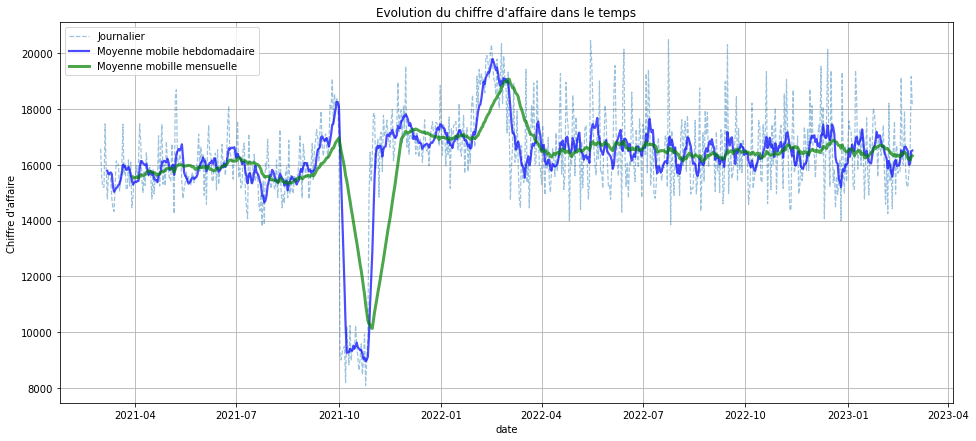

In [4]:
# On analyse la tendance globale
ca_jour = df_final.groupby(df_final['date'].dt.date).sum()['price']
ca_semaine = ca_jour.rolling(7).mean()
ca_mois = ca_jour.rolling(30).mean()

plt.figure( figsize=(16,7) )
ca_jour.plot(label='''Journalier''', lw=1.2, style='--', alpha=0.45, ms=4)
ca_semaine.plot(label='''Moyenne mobile hebdomadaire''', lw=2.2, color='b', alpha=0.7)
ca_mois.plot(label='''Moyenne mobille mensuelle''', lw=3, color='g', alpha=0.7)

plt.legend();
plt.grid()
plt.ylabel('''Chiffre d'affaire''')
plt.title('''Evolution du chiffre d'affaire dans le temps''');

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C6"> Profils clients </a></h2>

,client_id,ca,frequence achat
0,c_1,558.18,39
1,c_10,1353.60,58
2,c_100,254.85,8
3,c_1000,2261.89,125
4,c_1001,1812.86,102


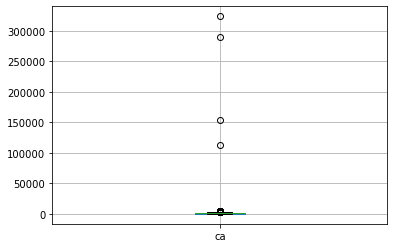

In [5]:
# Profils des clients
profils = df_final.groupby(["client_id"]).agg({"price":"sum", "id_prod":"count"}).reset_index()
profils.rename(columns={"price":"ca", "id_prod":"frequence achat"}, inplace=True)
display(profils.head())

# On check les outliers au niveau des ca produits
profils.boxplot(column=['ca']) 
plt.show()

<div class="alert-warning">
    On a 4 clients atypiques
</div>
<br>

<div class="alert-info">
Il s'agit des clients : c_1609 , c_4958, c_6714 et c_3454. Ces client se distinguent des autres de par leurs chiffres d'affaire conséquents. Ce sont certainement des clients B2B.
</div>
<br>

In [12]:
profils["type_client"] = pd.cut(profils["ca"], bins=[0,10000,10000000000000000], labels = ["B2C","B2B"])
profils.sort_values(by="ca", ascending=False).head()

,client_id,ca,frequence achat,type_client
677,c_1609,324033.35,25488,B2B
4388,c_4958,289760.34,5195,B2B
6337,c_6714,153662.76,9187,B2B
2724,c_3454,113669.85,6773,B2B
2513,c_3263,5276.87,403,B2C


In [17]:
df_final['Type_client'] = 'particulier'

reverse_sorted_customers = df_final.groupby('client_id').size().sort_values(ascending=False).index
professionals = reverse_sorted_customers[:4]
df_final['Type_client'][ df_final['client_id'].isin(professionals) ] = 'professionnel'

df_final2 = df_final.copy()

B2C = df_final2.loc[df_final2["Type_client"]=="particulier"]
B2B = df_final2.loc[df_final2["Type_client"]=='professionnel']

In [18]:
B2B.groupby("age_client").sum()["price"]

age_client
23    289760.34
42    324033.35
53    113669.85
54    153662.76
Name: price, dtype: float64


<div class="alert-info">
    <p><strong> Profils des clients B2B </strong></p>
    <li>Un client B2B de 42 ans avec un chiffre d'affaire total de 324033 </li>
    <li>Un client B2B de 23 ans avec un ca de 289760</li>
    <li>Un client B2B de 53 ans avec un chiffre d'affaire total de 113669 </li>
    <li>Un client B2B de 24 ans avec un ca de 153 662</li>
</div>
<br>

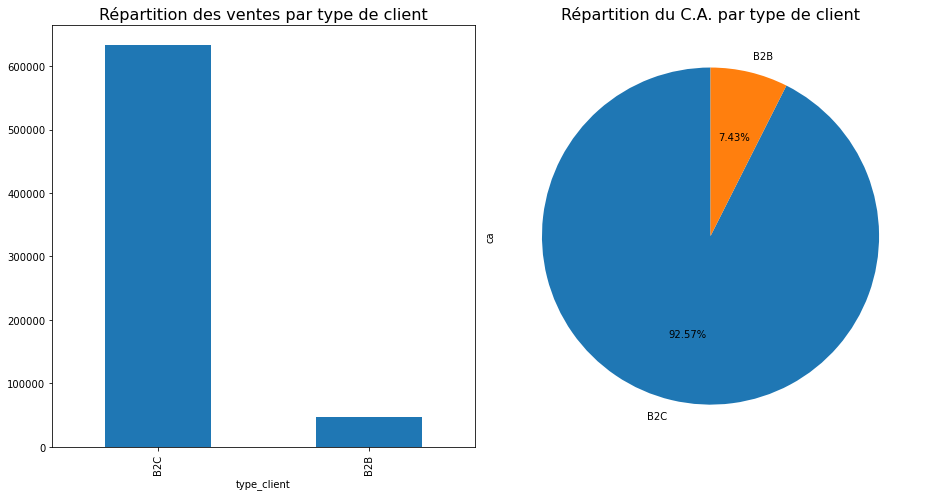

In [19]:
type_client = profils.groupby("type_client").sum()

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("Répartition des ventes par type de client", fontsize=16)
type_client["frequence achat"].plot(kind="bar")

plt.subplot(122)
plt.title("Répartition du C.A. par type de client", fontsize=16)
type_client["ca"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.tight_layout()
plt.show()

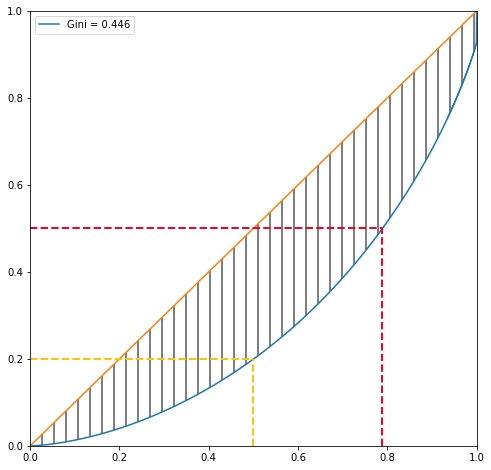

In [20]:
#Répartition du ca par client
n = len(profils['ca'])

# Y axe: Cumsum, from 0 to 1
lorenz = np.cumsum(np.sort(profils['ca'].values)) / profils['ca'].values.sum()

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

# X axe: Linspace, from 0 to 1
xaxis = np.linspace(0,1,len(lorenz))

plt.figure(figsize=(8,8))
xaxis = np.linspace(0,1,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis, lorenz,drawstyle='steps-post', label='Gini = %.3f'%gini)

plt.plot([0,1], [0,1]) #tracer la bisséctrice,

plt.legend()
plt.fill_between(xaxis, xaxis, lorenz,alpha=0.001, hatch="|",)

median = lorenz[int(len(lorenz) / 2)]
plt.plot([0.5, 0.5], [0, median], color='#fcc500', linestyle='--', linewidth=2, label="Median")
plt.plot([0, 0.5], [median, median], color='#fcc500', linestyle='--', linewidth=2)

medial = len(lorenz[lorenz<= 0.5]) / len(lorenz)
plt.plot([0, medial], [0.5, 0.5], color='#f70028', linestyle='--', linewidth=2, label="Medial")
plt.plot([medial, medial], [0, 0.5], color='#f70028', linestyle='--', linewidth=2)

#plt.vlines(0.96, 0.0, 0.8, linestyles='--', color='r')
#plt.hlines(0.9, 0.0, 0.99, linestyles='--', color='r')

plt.xlim(0,1)
plt.ylim(0,1);

plt.show()

<div class="alert-info">
    <li>La première moitié des clients ( soit 50% des clients) rapporte environ 20% du chiffre d'affaire total.</li>
    <li>La seconde moitié pour environ 80% du chiffre d'affaire.</li>
</div>

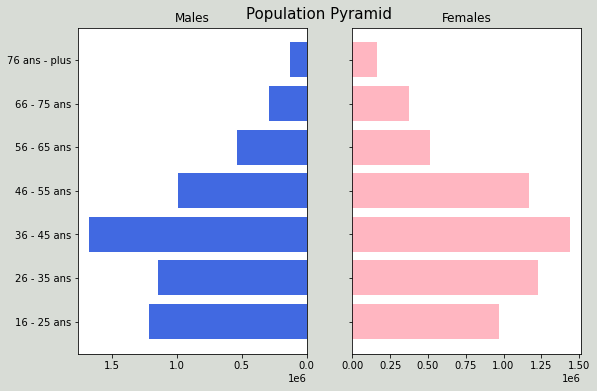

In [22]:
df_pop_sex = df_final.groupby(["tranche_age", "sex"]).agg({"id_prod":"count","price":"sum"}).reset_index()
female = df_pop_sex[df_pop_sex["sex"]=="f"].copy()
female.rename(columns={"id_prod":"female"}, inplace=True)
male = df_pop_sex[df_pop_sex["sex"]=="m"].copy()
male.rename(columns={"id_prod":"male"}, inplace=True)
pyramid = pd.merge(male, female, on="tranche_age")
pyramid.drop(columns=["sex_x","sex_y"], inplace=True)

pyramid.rename(columns={"price_x":"ca_male", "price_y":"ca_female"}, inplace=True)
pyramid["ca_total"] = pyramid["ca_male"] + pyramid["ca_female"]

y = pyramid["tranche_age"]
x_male = pyramid["ca_male"]
x_female = pyramid["ca_female"]


fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    

axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females',)

#adjust grid parameters and specify labels for y-axis
#axes[1].grid()
#axes[0].set(yticks=y, yticklabels=pyramid['age_client'])
axes[0].invert_xaxis()
#axes[0].grid()

#display plot
plt.show()

La ditribution au niveau du chiffre d'affaire par rapport à l'age se comporte à peu pres de la même manière peu importe le genre. 

Elle croit dans un premier temps et atteind son sommet à la classe des 36-45 ans.

Elle décroit ensuite avec l'age


<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"
    ><a name="C7"> Best sellers / Flops </a></h2>

,id_prod,categ,price,nbr_ventes,ca
0,0_0,0,3.75,1242,4657.50
1,0_1,0,10.99,487,5352.13
2,0_10,0,17.95,22,394.90
3,0_100,0,20.60,3,61.80
4,0_1000,0,6.84,432,2954.88


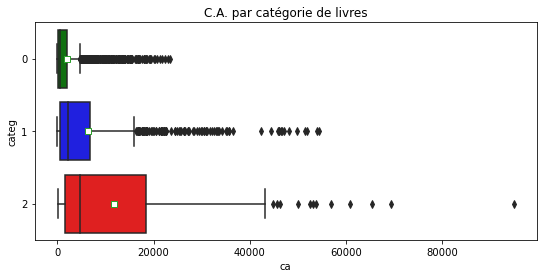

In [23]:
# On calcule le nombre de ventes et le chiffre d'affaire de chaque produit
df_ref = df_final.copy()
df_ref = df_ref.assign(nbr_ventes=1)
df_ref = df_ref.groupby(["id_prod","categ","price"]).agg({"nbr_ventes":"sum"}).reset_index()
df_ref["ca"] = df_ref["price"] * df_ref["nbr_ventes"]
display(df_ref.head())

# On check les outliers au niveau des ca produits
plt.figure(figsize=(9,4))
palette = ['g','b','r']
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=df_ref, y="categ",x='ca', orient='h', showmeans=True, palette=palette, meanprops=meanprops)
plt.title('C.A. par catégorie de livres');
plt.show()

#### <a name="C3"> Top ventes /Top CA </a> 

Indice de gini : 0.74


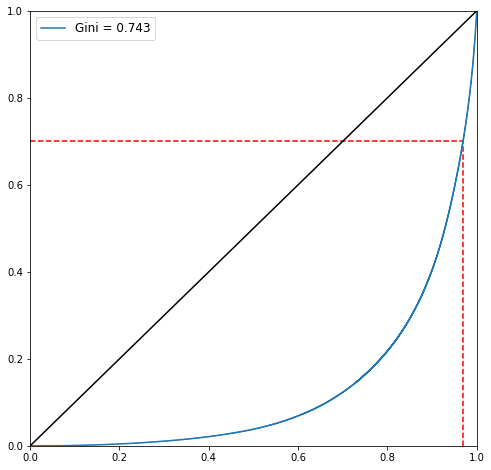

In [24]:
#On calcule la repartition du ca par produit
ca_produit_trie = df_final.groupby('id_prod').sum()['price'].sort_values()

lorenz2 = np.cumsum(ca_produit_trie.values) / ca_produit_trie.values.sum()
n2 = ca_produit_trie.values.size
AUC2 = (lorenz2.sum() -lorenz2[-1]/2 -lorenz2[0]/2)/n2 # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S2 = 0.5 - AUC2 # surface entre la première bissectrice et le courbe de Lorenz
gini2 = 2*S2



plt.figure(figsize=(8,8))
xaxis2 = np.linspace(0,1,len(lorenz2)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis2, lorenz2,drawstyle='steps-post', label='Gini = %.3f'%gini2)

plt.legend( fontsize=12 )
plt.plot([0,1],[0,1],'k')
plt.vlines(0.97, 0.0, 0.7, linestyles='--', color='r')
plt.hlines(0.7, 0.0, 0.97, linestyles='--', color='r')
#plt.gca().set_aspect('equal')

plt.xlim(0,1)
plt.ylim(0,1);


print("Indice de gini :",round(gini2,2))


On peut voir que 30% du chiffre d'affaire est généré par 3% des produits. 

In [25]:
tops = ca_produit_trie[ (lorenz2 > 0.7) ]
display(tops.head())
print("Il y a au total", len(tops),"livres dnas la liste des tops.")

id_prod
2_172    22460.14
1_459    22481.94
1_433    22617.09
1_462    22674.26
2_185    22786.82
Name: price, dtype: float64

Il y a au total 101 livres dnas la liste des tops.


,ca,nbr_ventes
categ,,
0,46461.14,2
1,1874736.14,55
2,1656918.71,44


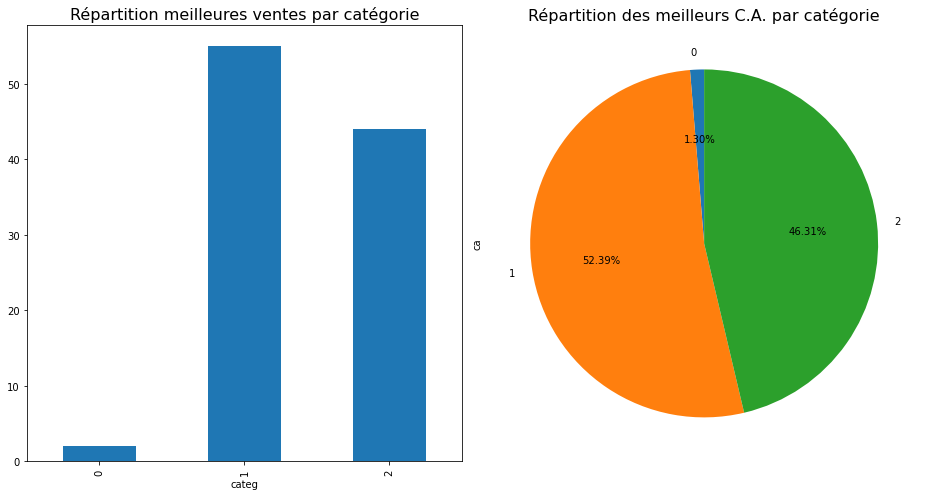

In [26]:
tops = ca_produit_trie[ (lorenz2 > 0.7) ]
tops = tops.reset_index()
tops["categ"] = [s[0] for s in tops["id_prod"]]
#tops["categ"].value_counts().plot(kind="bar")
#sns.histplot(data=tops, x='price', hue='categ',multiple="dodge", shrink=.6)
#plt.show()
repart_tops = tops.groupby("categ").agg({"price":"sum","id_prod":"count"})
repart_tops.rename(columns={"price":"ca", "id_prod":"nbr_ventes"}, inplace=True)
display(repart_tops)

plt.figure( figsize=(13,7) )

colors = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue',"teal","tan", "thistle"]


plt.subplot(121)
plt.title("Répartition meilleures ventes par catégorie", fontsize=16)
repart_tops["nbr_ventes"].plot(kind="bar")

plt.subplot(122)
plt.title("Répartition des meilleurs C.A. par catégorie", fontsize=16)
repart_tops["ca"].plot(kind="pie",autopct='%1.2f%%', startangle=90)

plt.tight_layout()
plt.show()

#### <a name="C3"> Flop 20 ventes </a> 

In [32]:
flops = df_ref[df_ref["nbr_ventes"] < 2]
flops

,id_prod,categ,price,nbr_ventes,ca
166,0_1151,0,2.99,1,2.99
313,0_1284,0,1.38,1,1.38
417,0_1379,0,2.99,1,2.99
549,0_1498,0,2.48,1,2.48
595,0_1539,0,0.99,1,0.99
665,0_1601,0,1.99,1,1.99
698,0_1633,0,24.99,1,24.99
752,0_1683,0,2.99,1,2.99
802,0_1728,0,2.27,1,2.27
1327,0_2201,0,20.99,1,20.99


In [ ]:
## On exporte le df final
B2B.to_csv("B2B.csv", encoding='utf-8', index=False)
B2C.to_csv("B2C.csv", encoding='utf-8', index=False)

In [ ]:
df_final2.to_csv("df_final2.csv", encoding='utf-8', index=False)